# Traffic Signs Recognition using CNN & Keras
### In this Python project example, we will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

### Our approach to building this traffic sign classification model is discussed in four steps:

- Explore the dataset
- Build a CNN model
- Train and validate the model
- Test the model with test dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Prave\\OneDrive\\Desktop\\IDB\\archive'

In [4]:
cd/Users/Prave/OneDrive/Desktop/IDB/archive/Train

C:\Users\Prave\OneDrive\Desktop\IDB\archive\Train


In [5]:
os.getcwd()

'C:\\Users\\Prave\\OneDrive\\Desktop\\IDB\\archive\\Train'

# The Dataset of Python Project
### For this project, we are using the public dataset available at Kaggle:

### <a href="https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/code">Traffic Signs Dataset</a>

### The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes. The dataset is quite varying, some of the classes have many images while some classes have few images. The size of the dataset is around 300 MB. The dataset has a train folder which contains images inside each class and a test folder which we will use for testing our model.

In [6]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

# Show Datasets in CSV Formet

In [10]:
train_data=pd.read_csv('C:\\Users\\Prave\\OneDrive\\Desktop\\IDB\\archive\\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('C:\\Users\\Prave\\OneDrive\\Desktop\\IDB\\archive\\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [11]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [12]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [13]:
cd/Users/Prave/OneDrive/Desktop/IDB/archive

C:\Users\Prave\OneDrive\Desktop\IDB\archive


# Visualize the testing Data

C:\Users\Prave\AppData\Local\Temp\ipykernel_2476\4266318641.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


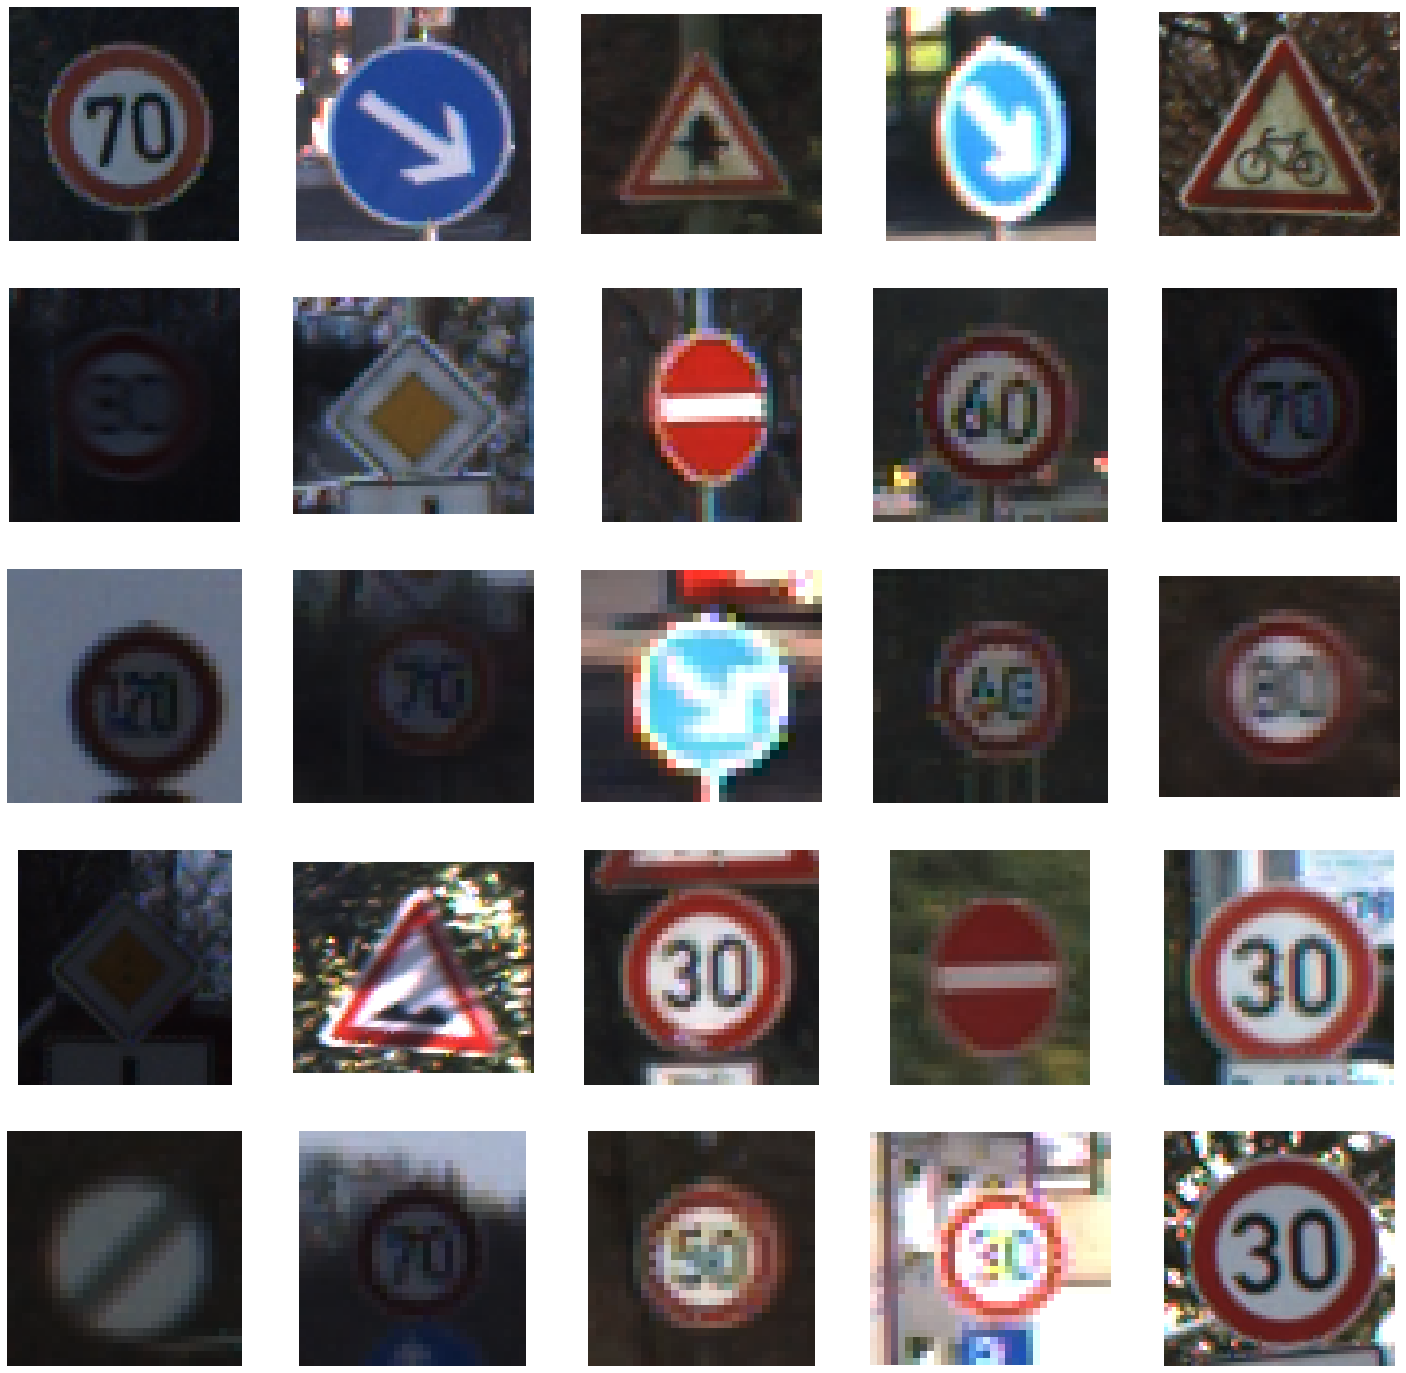

In [14]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)

In [15]:
cd/Users/Prave/OneDrive/Desktop/IDB/archive/Train

C:\Users\Prave\OneDrive\Desktop\IDB\archive\Train


# Visualize the Training Datasets in Sorted grids formet

Text(0, 0.5, 'Number of images')

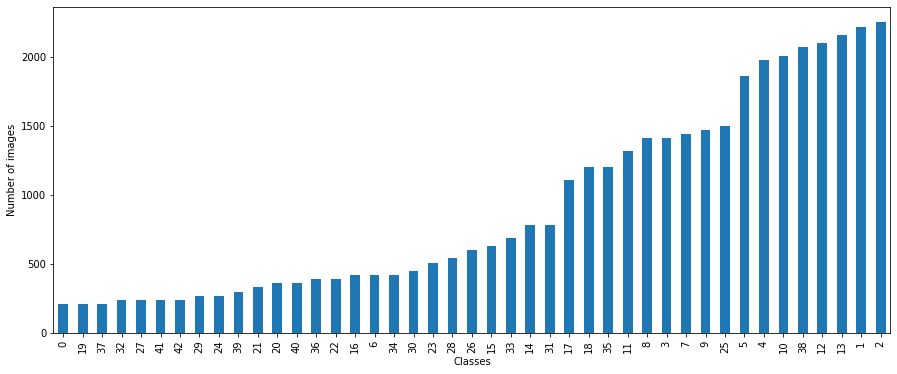

In [16]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

# Build a CNN model

In [17]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [19]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: c:\users\prave\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [20]:
import visualkeras

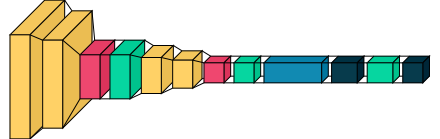

In [21]:
visualkeras.layered_view(model)

# Train and validate the model

In [22]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 43s 85ms/step - loss: 2.3701 - accuracy: 0.4240 - val_loss: 0.6998 - val_accuracy: 0.8162
Epoch 2/20
491/491 [==============================] - 47s 96ms/step - loss: 0.8538 - accuracy: 0.7500 - val_loss: 0.3266 - val_accuracy: 0.9096
Epoch 3/20
491/491 [==============================] - 45s 92ms/step - loss: 0.5537 - accuracy: 0.8356 - val_loss: 0.2217 - val_accuracy: 0.9401
Epoch 4/20
491/491 [==============================] - 44s 89ms/step - loss: 0.4280 - accuracy: 0.8717 - val_loss: 0.2636 - val_accuracy: 0.9314
Epoch 5/20
491/491 [==============================] - 43s 87ms/step - loss: 0.3563 - accuracy: 0.8958 - val_loss: 0.1113 - val_accuracy: 0.9681
Epoch 6/20
491/491 [==============================] - 41s 84ms/step - loss: 0.2918 - accuracy: 0.9137 - val_loss: 0.1470 - val_accuracy: 0.9512
Epoch 7/20
491/491 [==============================] - 41s 84ms/step - loss: 0.2680 - accuracy: 0.9206 - val_loss: 0.0750 - val_accuracy:

# Plotting graphs for accuracy

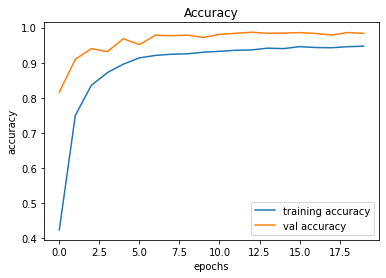

In [23]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

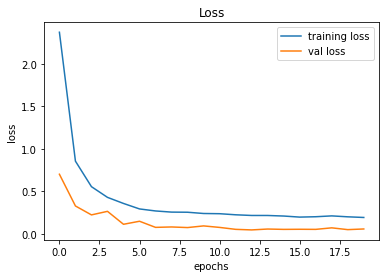

In [24]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evalution

In [25]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.056132722645998
Test accuracy 0.983422577381134


In [26]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 3s 10ms/step


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.97      0.98      0.97       496
           2       0.99      0.97      0.98       420
           3       1.00      0.98      0.99       294
           4       0.99      0.98      0.99       400
           5       0.94      0.98      0.96       364
           6       0.96      0.99      0.97        69
           7       0.96      0.98      0.97       313
           8       0.99      0.96      0.97       274
           9       1.00      1.00      1.00       277
          10       0.99      1.00      1.00       398
          11       0.98      0.99      0.99       261
          12       1.00      1.00      1.00       443
          13       1.00      1.00      1.00       422
          14       1.00      0.98      0.99       135
          15       0.99      1.00      1.00       118
          16       0.99      1.00      0.99        86
          17       0.99    

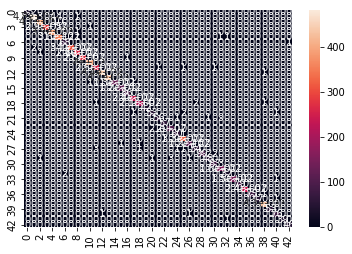

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9834225962764601

In [30]:
model.save('traffic_classifier.h5')

# Build the Simple App Using Tkinter

In [31]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
   global label_packed
   image = Image.open(file_path)
   image = image.resize((30,30))
   image = numpy.expand_dims(image, axis=0)
   image = numpy.array(image)
   pred = numpy.argmax(model.predict(image), axis=-1)[0]
   sign = classes[pred+1]
   print(sign)
   label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
   classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
   classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
   classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
       file_path=filedialog.askopenfilename()
       uploaded=Image.open(file_path)
       uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
       im=ImageTk.PhotoImage(uploaded)
       sign_image.configure(image=im)
       sign_image.image=im
       label.configure(text='')
       show_classify_button(file_path)
    except:
       pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="check traffic sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 135ms/step
Veh > 3.5 tons prohibited
1/1 [==============================] - 0s 27ms/step
Speed limit (30km/h)
1/1 [==============================] - 0s 27ms/step
Keep right
1/1 [==============================] - 0s 23ms/step
Stop
1/1 [==============================] - 0s 23ms/step
Right-of-way at intersection
1/1 [==============================] - 0s 26ms/step
Keep right
1/1 [==============================] - 0s 27ms/step
General caution


## GUI
<img title="GUI" alt="Alt text" src="Gui.png">